(ws5)=

# Worksheet 5

## To accompany Unit 3.4 Applications of Line Spectra

## Colophon

This worksheet can be downloaded as a [PDF file](https://cpjobling.github.io/eg-247-textbook/worksheets/worksheet5.pdf). We will step through this worksheet in class.

An annotatable copy of the notes for this presentation will be distributed before the second class meeting as **Worksheet 5** in the **Week 4: Classroom Activities** section of the Canvas site. I will also distribute a copy to your personal **Worksheets** section of the **OneNote Class Notebook** so that you can add your own notes using OneNote.

You are expected to have at least watched the video presentation of {ref}`unit3.4` of the [notes](https://cpjobling.github.io/eg-247-textbook/) before coming to class. If you haven't watch it afterwards!

After class, the lecture recording and the annotated version of the worksheets will be made available through Canvas.

## Power in Periodic Signals

In your previous courses you may have come across the definitions of Signal Energy, Average Signal Power and Root Mean Square Power:

$$E = \int_0^T |f(t)|^2 dt$$

$$P_{\mathrm{av}} = \frac{1}{T}\int_0^T |f(t)|^2 dt$$

$$P_{\mathrm{RMS}} = \sqrt{\frac{1}{T}\int_0^T |f(t)|^2 dt}$$

### Parseval's Theorem

[Parseval's Theorem](https://en.wikipedia.org/wiki/Parseval's_theorem) states that the total average power of a periodic signal $f(t)$ is equal to the sum of the average powers of all its harmonic components.

The power in the $k$th harmonic $C_ke^{jk\Omega_0 t}$ is given by

$$P_k = \frac{1}{T}\int_0^T\left|C_ke^{jk\Omega_0 t}\right|^2\,dt = \frac{1}{T}\int_0^T\left|C_k\right|^2\,dt=\left|C_k\right|^2$$

Since $P_k = P_{-k}$, the total power of the $k$th harmomic is $2P_k$.

You should note that $|C_k| = \sqrt{C_k C_k^*}$ so $|C_k|^2 = C_k C_k^*$.

Parseval's theorem states that

$$P = \frac{1}{T}\int_0^T \left|f(t)\right|^2\,dt = \sum_{k=-\infty}^{\infty}\left|C_k\right|^2.$$

### RMS Power

By a similar argument:

$$P_{\mathrm{RMS}} = \sqrt{\frac{1}{T}\int_0^T \left|f(t)\right|^2\,dt} = \sqrt{\sum_{k=-\infty}^{\infty}\left|C_k\right|^2}.$$

(ex:ws:19.1)=

### Example 6

Compute the average power of a pulse train for which the pulse width is $T/2$ (duty cycle 50%). Use the result:

$$C_k = \frac{A}{w}.\frac{\sin(k\pi/w)}{k\pi/w} = \frac{A}{2}\mathop{\rm sinc}\left(\frac{k}{w}\right)$$

as your starting point.

### Solution

<pre style="border: 2px solid blue">















</pre>

(ex:ws:19.2)=

### Example 7: Power Spectrum

Compute and display the power spectrum for the signal of {ref}`ex:ws:19.1`.

In [4]:
clear all
cd ../matlab
format compact; 
setappdata(0, "MKernel_plot_format", 'svg')

In [7]:
A = 1; w = 10;
[f,omega] = pulse_fs(A,w,15);

Power spectrum

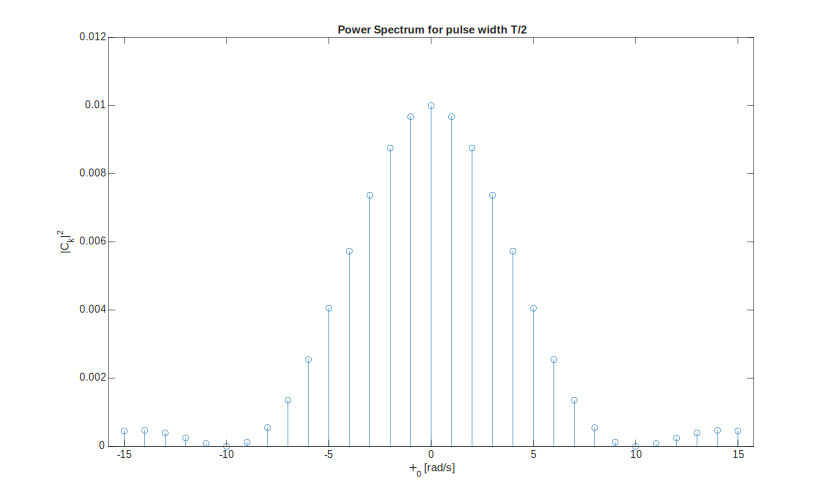

In [8]:
stem(omega,abs(f).^2)
title('Power Spectrum for pulse width T/2')
ylabel('|C_k|^2')
xlabel('\Omega_0 [rad/s]')

Note that most of the power is concentrated at DC and in the first five harmonic components. That is in the frequency range $[-14\pi/T,+14\pi/T]$ rad/s.

### Total Harmonic Distortion

Suppose that a signal that is supposed to be a pure sine wave of amplitude A is distorted as shown below

<img src="pictures/thd.png">

This can occur in the line voltages of an industrial plant that makes heavy use of nonlineear loads such as electric arc furnaces, solid state relays, motor drives, etc (E.g. Tata Steel!)

#### THD Defined

Clearly, some of the harmonics for $k\ne \pm 1$ are nonzero. One way to characterize the distortion is to compute the ratio of average power in all the harmonics that "should not be present", that is for $k > 1$, to the total average power of the distorted sine wave. The square-root of this ratio is called the _total harmonic distortion_ (THD) of the signal.

If the signal is real and based on a sine wave (that is _odd_), then $C_k=0$ and

$$f_{\mathrm{RMS}}=\sqrt{\sum_{k=1}^{\infty}2|C_k|^2}$$

and we can define the THD as the ratio of the RMS value for all the harmonics for $K>1$ (the distortion) to the RMS of the fundamental which is $$\sqrt{2\left|C_1\right|^2}:$$

$${\rm{THD}} = 100\sqrt {\frac{\sum\limits_{k = 2}^\infty  {\left| C_k \right|^2}} {\left| C_1 \right|^2}} \% $$

#### Computation of THD

<img src="pictures/thd_ps.png">

(ex:ws:19.3)=

### Example 8: THD in a square-wave

Given that the exponential fourier series coefficients for a square wave are

$$C_0 = 0$$

$$C_k = 0\quad k\,\mathrm{even}$$

$$C_k = \frac{2A}{jk\pi}\quad k\,\mathrm{odd}$$

compute the total harmonic distortion represented by the first 7 harmonics of the square-wave.

### Solution

<pre style="border: 2px solid blue">















</pre>

(ex:ws:19.4)=

### Example 9: THD in a triangle wave

Given that the exponential fourier series coefficients for a triangle wave with even symmetry is

$$C_0 = 0$$

$$C_k = 0\quad k\,\mathrm{even}$$

$$C_k = -\frac{4A}{jk^2\pi^2}\quad k\,\mathrm{odd}$$

compute the total harmonic distortion represented by the first 7 harmonics of the triangle-wave.

## Steady-State Response of an LTI System to a Periodic Signal

As shown in [Eigenfunctions of Continuous-Time LTI Systems](https://cpjobling.github.io/eg-150-textbook/lti_systems/lti2.html#eigenfunctions-of-continuous-time-lti-systems), the response of a continuous-time LTI system with impulse response $h(t)$ to a complex exponential signal $e^{st}$ is the same complex exponential multiplied by a complex gain: $y(t) = H(s)e^{st}$, where:

$$H(s)=\int_{-\infty}^{\infty}h(\tau)e^{-s\tau}\,d\tau.$$

In particular, for $s = j\omega$, the output is simply $y(t)=H(j\omega)e^{j\omega t}$.

The complex functions $H(s)$ and $H(j\omega)$ are called the system's _transfer function_ and _frequency response_, respectively.

### By superposition

The output of an LTI system to a periodic function with period $T$ represented by a Fourier series is given by:

$$y(t)=\sum_{k=-\infty}^{\infty} C_kH(jk\Omega_0)e^{jk\Omega_0 t}$$

where $\Omega_0 = T/2\pi$ is the fundamental frequency.

Thus $y(t)$ is a Fourier series itself with coefficients $D_k$:

$$D_k = C_kH(jk\Omega_0)$$ (fs4:d_k:ws)

### Illustration

This picture below shows the effect of an LTI system on a periodic input in the frequency domain.

<img src="pictures/filter.png">

### Application to signal processing

A consequence of the previous result is that we can design a system that has a desirable frequency spectrum $H(jk\Omega_0)$ that retains certain frequencies and cuts off others.

### Filter attenuation

The effect of an LTI system on a periodic input signal is to modify its Fourier series through a multiplication by its frequency response evaluated at the harmonic frequencies.

So what does $H(jk\Omega_0)$ looks like.

[change this to an RC circuit filter]

As an example, consider the simple first-order Butterworth low-pass (LP) filter with cut-off frequency $\omega_c$:

$$H(s) = \frac{\omega_c}{s + \omega_c}$$

For this filter

$$H(j\omega) = \frac{\omega_c}{j\omega + \omega_c}.$$

Let us say that we wish to compute the attenuation and phase of this filter at $\omega = \Omega_0$.

To compute the _magnitude_:

$$
\begin{eqnarray*}
\left|H(j\Omega_0)\right| &=& \left|\frac{\omega_c}{j\Omega_0 + \omega_c}\right| \\
& = & \frac{\omega_c}{\sqrt{\Omega_0^2 + \omega_c^2}}
\end{eqnarray*}
$$

We note that is $\left|H(j\Omega_0\right| \lt 1$ so the filter will _attenuate_ the incoming harmonic frequency. This will be true for all harmonics, so in general, for a LP filter:

$$D_k = C_k\left|H(jk\Omega_0)\right|   < C_k.$$

The phase will be given by

$$\phi = \angle H(j\omega) = \tan^{-1}\left(\frac{\Im \left( H(j\omega)\right)}{\Re \left(H(j(\omega)\right)}\right)$$

where

$$
\begin{eqnarray*}
H(jk\Omega_0) &=& \frac{\omega_c^2}{(k\Omega_0)^2 + \omega_c^2} - j\frac{k\Omega_0\omega_c}{(k\Omega_0)^2 + \omega_c^2}\\
\phi_k &=& \tan^{-1}\left(-\frac{K\Omega_0\omega_c}{\omega_c^2}\right) \\
&=& \tan^{-1}\left(-\frac{k\Omega_0}{\omega_c}\right)
\end{eqnarray*}
$$

Phases are additive so

$$\angle D_k = \angle C_k + \phi_k.$$

By doing such analysis, we can examine the effect of a filter on a periodic signal, just by considering how the coefficients of the harmonic terms are changed (attenuated in magnitude and shifted in phase) by the filter.

(ex:ws:19.5)=

### Example 10: Low-pass filter

**This is an examination level question.**

This example represents the low-pass filter used in the signal generator project for **EG-152: Analogue Design**.

:::{note}
Use MATLAB to complete this example.
:::

a) A triangle waveform $x(t)$ with frequency $\Omega_0 = 2\pi/T$ is shown in {numref}`fig_ex19.1a`.

:::{figure-md} fig_ex19.1a
<img src="pictures/ex19_5.png" alt="A triangle waveform" width="60%">

A triangle waveform
:::

Determine the exponential Fourier series coefficients $C_k$ for this waveform and use this result to show that the trigonomentric Fourier series for a triangle waveform is

$$x(t) = \frac{8A}{\pi^2}\left(\sum_{k\ \mathrm{odd}}(-1)^{\left(\frac{k-1}{2}\right)}\frac{1}{k^2}\sin k \Omega_0 t \right)$$ (fse4:ws:fs4tri)

which, for the first seven harmonic frequencies, is given as

$$x(t) \approx \frac{8A}{\pi^2}\left(\sin \Omega_0 t - \frac{1}{9} \sin 3\Omega_0 t + \frac{1}{25} \sin 5\Omega_0 t - \frac{1}{49} \sin 7\Omega_0 t \cdots \right) $$

### Solution

<pre style="border: 2px solid blue">






























</pre>

b) In the signal generator, the block diagram for which is given in {numref}`fig19_5a_bd_ws`, a triangle wavefom with $A = 10$ and frequency $f = 1/T = 2.5$ kHz, is filtered by the low-pass filter with transfer function

$$H(s) = \frac{a^2}{s^2 + 3as + a^2}$$

where $a = 1/(RC)$ and $RC$ is the time constant of an RC circuit with $R = 8.2$ k&Omega; and $C  = 10$ nF.

:::{figure-md} fig19_5a_bd_ws
<img src="pictures/ex19_5_bd.png" alt="A signal generator" width="60%">

A signal generator
:::

i) Determine the frequency response $H(j\omega)$ of the filter.

### Solution

<pre style="border: 2px solid blue">















</pre>

ii) Compute the cut-off frequency $\omega_c$ of the filter. Note the value of the cut-off frequency this is the frequency for which the filter transmits half-the power or

$$|H(j\omega_c)| = \frac{1}{\sqrt{2}}$$

### Solution

<pre style="border: 2px solid blue">















</pre>

iii) Use equation {eq}`fs4:d_k:ws` and the result of a) to determine the attenuation in the first 7 harmonics of the triangle waveform.

### Solution

<pre style="border: 2px solid blue">















</pre>

iv) The filter is intended to generate a sinewave from the triangle wave. Determine the value of the recovery gain $K$ to ensure that the attenuation is 0 dB at 2.5 kHz. Recompute the harmonic attenuation given the presence of $K$.

### Solution

<pre style="border: 2px solid blue">















</pre>

### Solution

<pre style="border: 2px solid blue">















</pre>

v) Use these results to determine the THD (in dB) of the filtered waveform.

### Solution

<pre style="border: 2px solid blue">















</pre>

vi) Use the attached Simulink model ([ex19_5.slx](../matlab/ex19_5.slx)) of the the filter to validate the results. Comment on the quality of the design.

K =
     1

Hs =
 
           1.487e08
  ---------------------------
  s^2 + 3.659e04 s + 1.487e08
 
Continuous-time transfer function.


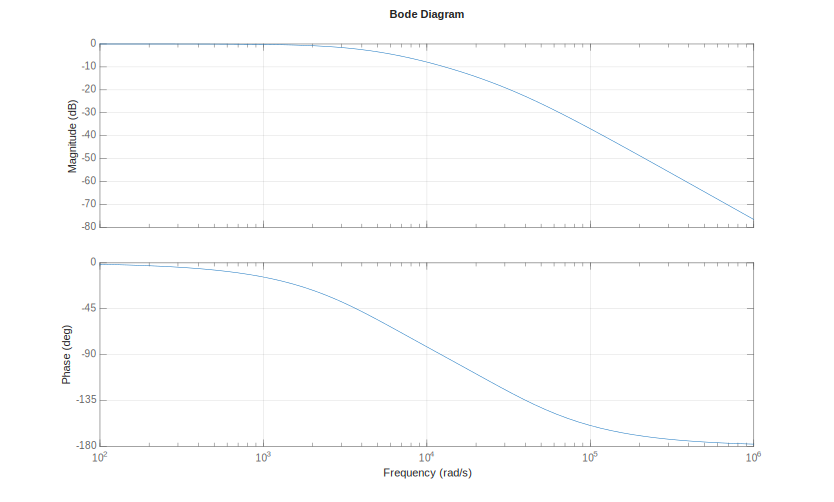

In [9]:
cd ../matlab
% For Simulink model
R = 8.2e3; % 8.2 kOhm
C = 10e-9; % 10 nF
a = (1/(R*C)); % filter coefficient
K =  1 % replace wthis value with the value computed in Exercise 10(b)(iv)
Hs = tf(a^2,[1 3*a a^2])
bode(Hs),grid

In [11]:
ex19_5